In [33]:
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!

#Regex
import re

#Machine learning
from sklearn.model_selection import train_test_split
import xgboost as xgb

#We will beed a modellinglibraru: Statsmodels
import statsmodels.api as sm # contains the model(s)
import statsmodels.tools # contains the metrics and othersa

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
housing_data = 'UK-HPI-full-file-2024-03.csv'
df = pd.read_csv(housing_data)

# Meta-Data - Column Explanation

|Columns | Details |
|------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| Date                         | The year and month to which the monthly statistics apply                                                                                        |
| RegionName                   | Name of geography (Country, Regional, County/Unitary/District Authority and London Borough)                                                     |
| AreaCode                     | Code of geography (Country, Regional, County/Unitary/District Authority and London Borough)                                                     |
| Average Price                | Average house price for a geography in a particular period                                                                                      |
| Index                        | House price index for a geography in a particular period (January 2015=100).                                                                    |
| IndexSA                      | Seasonally adjusted house price for a geography in a particular period (January 2015=100).                                                      |
| 1m%change                    | The percentage change in the Average Price compared to the previous month                                                                       |
| 12m%change                   | The percentage change in the Average Price compared to the same period twelve months earlier.                                                   |
| AveragePricesSA              | Seasonally adjusted Average Price for a geography in a particular period                                                                        |
| Sales Volume                 | Number of registered transactions for a geography in a particular period                                                                        |
| [Property Type]Price         | Average house price for a particular property type (such as detached houses), for a geography in a particular period.                           |
| [Property Type]Index         | House price index for a particular property type (such as detached houses), for a geography in a particular period (January 2015=100).          |
| [Property Type]1m%change     | The percentage change in the [Property Type] Price (such as detached houses) compared to the previous month                                     |
| [Property Type]12m%change    | The percentage change in the [Property Type] Price (such as detached houses) compared to the same period twelve months earlier.                 |
| [Cash/Mortgage]Price         | Average house price by funding status (such as cash), for a geography in a particular period.                                                   |
| [Cash/Mortgage]Index         | House price index by funding status (such as cash), for a geography in a particular period (January 2015=100).                                  |
| [Cash/Mortgage]1m%change     | The percentage change in the [Cash/Mortgage]Price compared to the previous month                                                                |
| [Cash/Mortgage]12m%change    | The percentage change in the [Cash/Mortgage]Price compared to the same period twelve months earlier.                                            |
| [Cash/Mortgage] Sales Volume | Number of registered transactions [Cash/Mortgage] for a geography in a particular period                                                        |
| [FTB/FOO]Price               | Average house price by buyer status (such as first time buyer/former owner occupier), for a geography in a particular period.                   |
| [FTB/FOO]Index               | House price index by buyer status (such as first time buyer/former owner occupier), for a geography in a particular period. (January 2015=100). |
| [FTB/FOO]1m%change           | The percentage change in the [FTB/FOO]Price compared to the previous month                                                                      |
| [FTB/FOO]12m%change          | The percentage change in the [FTB/FOO]Price compared to the same period twelve months earlier.                                                  |
| [New/Old]Price               | Average house price by property status (such as new or existing property), for a geography in a particular period.                              |
| [New/Old]Index               | House price index by property status (such as new or existing property), for a geography in a particular period. (January 2015=100).            |
| [New/Old]1m%change           | The percentage change in the [New/Old]Price compared to the previous month                                                                      |
| [New/Old]12m%change          | The percentage change in the [New/Old]Price compared to the same period twelve months earlier.                                                  |
| [New/Old] Sales Volume       | Number of registered transactions [New/Old] for a geography in a particular period                                                              |

In [3]:
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


## Data Checks

In [4]:
df.dtypes # checking the datatypes of the data

Date                       object
RegionName                 object
AreaCode                   object
AveragePrice              float64
Index                     float64
IndexSA                   float64
1m%Change                 float64
12m%Change                float64
AveragePriceSA            float64
SalesVolume               float64
DetachedPrice             float64
DetachedIndex             float64
Detached1m%Change         float64
Detached12m%Change        float64
SemiDetachedPrice         float64
SemiDetachedIndex         float64
SemiDetached1m%Change     float64
SemiDetached12m%Change    float64
TerracedPrice             float64
TerracedIndex             float64
Terraced1m%Change         float64
Terraced12m%Change        float64
FlatPrice                 float64
FlatIndex                 float64
Flat1m%Change             float64
Flat12m%Change            float64
CashPrice                 float64
CashIndex                 float64
Cash1m%Change             float64
Cash12m%Change

In [5]:
df.shape

(140580, 54)

**Making sure the date is a datetime datatype so it can be used**

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d/%m/%Y')

**Looking at the date range of the data**

In [7]:
latest = df.sort_values('Date', ascending = True).head(1)
recent = df.sort_values('Date', ascending = False).head(1)

print(f"The first date in the dataset is {latest['Date']}")
print(f"The last date in the dataset is {recent['Date']}")

The first date in the dataset is 131514   1968-04-01
Name: Date, dtype: datetime64[ns]
The last date in the dataset is 140579   2024-03-01
Name: Date, dtype: datetime64[ns]


**For the purpose of this dataset, the percentage change columns are not needed as I am trying to use key information and not calculated fields, so these columns will be dropped.**

In [8]:
def change_column_drop(df):
    columns_to_drop = re.findall('\w+%\w+', str(df.columns))
    try:
        df.drop(columns = columns_to_drop, inplace = True)
    except:
        print('Change Columns already dropped')
    return df
change_column_drop(df)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,...,FTBPrice,FTBIndex,FOOPrice,FOOIndex,NewPrice,NewIndex,NewSalesVolume,OldPrice,OldIndex,OldSalesVolume
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,388.0,122490.0641,43.610982,...,NaN,NaN,NaN,NaN,88436.13953,40.267250,103.0,81043.95084,40.883367,285.0
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,NaN,326.0,121280.8840,43.180469,...,NaN,NaN,NaN,NaN,88606.44649,40.344795,107.0,80965.29542,40.843688,219.0
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,NaN,453.0,123395.4269,43.933325,...,NaN,NaN,NaN,NaN,90296.91375,41.114508,140.0,82903.23948,41.821302,313.0
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,NaN,571.0,122334.0258,43.555427,...,NaN,NaN,NaN,NaN,90319.87844,41.124964,180.0,84003.99161,42.376586,391.0
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,NaN,502.0,124498.8747,44.326193,...,NaN,NaN,NaN,NaN,91989.17763,41.885039,167.0,86222.73484,43.495852,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140575,2023-11-01,Yorkshire and The Humber,E12000003,207712.00000,152.500000,148.5,202256.0,4777.0,334770.0000,153.600000,...,178225.0,152.6,233548.0,152.5,282116.00000,169.900000,46.0,204682.00000,152.500000,4731.0
140576,2023-12-01,Yorkshire and The Humber,E12000003,205804.00000,151.100000,147.7,201070.0,3840.0,330195.0000,151.500000,...,176954.0,151.5,230825.0,150.7,277658.00000,167.200000,72.0,202861.00000,151.100000,3768.0
140577,2024-01-01,Yorkshire and The Humber,E12000003,204859.00000,150.400000,148.1,201715.0,2043.0,332542.0000,152.600000,...,175525.0,150.3,230738.0,150.6,292927.00000,176.400000,15.0,201415.00000,150.000000,2028.0
140578,2024-02-01,Yorkshire and The Humber,E12000003,205335.00000,150.800000,148.8,202613.0,NaN,333870.0000,153.200000,...,176206.0,150.9,230866.0,150.7,NaN,NaN,NaN,NaN,NaN,NaN


## Checking for Nulls

In [9]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [10]:
null_vals(df)

,null,percent
IndexSA,135651,96.494
AveragePriceSA,135651,96.494
CashSalesVolume,83743,59.570
MortgageSalesVolume,83741,59.568
CashPrice,82956,59.010
CashIndex,82956,59.010
FOOIndex,82956,59.010
FOOPrice,82956,59.010
MortgageIndex,82956,59.010
MortgagePrice,82956,59.010


### Dropping nulls
From the dataset it seems that if there is a null in the index column then there will be a null in its correspoinding price column and vice versa so dropping nulls in 1 will remove the nulls in the other.

However dropping the nulls will lead to significant decrease in the dataset.

So when comparing the models between datasets, the size of this dataset will be taken into account.

In [11]:
index_null_drop = df.dropna(
    axis = 0, # default or we can write axis = 'row'
    how = 'any', # default mean if any values are NA then drop the row. 'all' means if all the row is missing then drop it
    subset = re.findall('\w+Index',str(df.columns)),   # subset tells dropna which columns in the dataframe to consider
    inplace = True # makes change permanent
)

In [12]:
index_null_drop = df.dropna(
    axis = 0, # default or we can write axis = 'row'
    how = 'any', # default mean if any values are NA then drop the row. 'all' means if all the row is missing then drop it
    subset = ['IndexSA', 'AveragePriceSA', 'NewSalesVolume'],   # subset tells dropna which columns in the dataframe to consider
    inplace = True # makes change permanent
)

In [13]:
null_vals(df)

,null,percent
Date,0,0.0
RegionName,0,0.0
OldIndex,0,0.0
OldPrice,0,0.0
NewSalesVolume,0,0.0
NewIndex,0,0.0
NewPrice,0,0.0
FOOIndex,0,0.0
FOOPrice,0,0.0
FTBIndex,0,0.0


In [14]:
df.shape

(2030, 32)

## Checking for Correlations

Firstly, heatmaps showing correlations will be used to indicate which features will work best for predicting each column 

### Main Heatmap

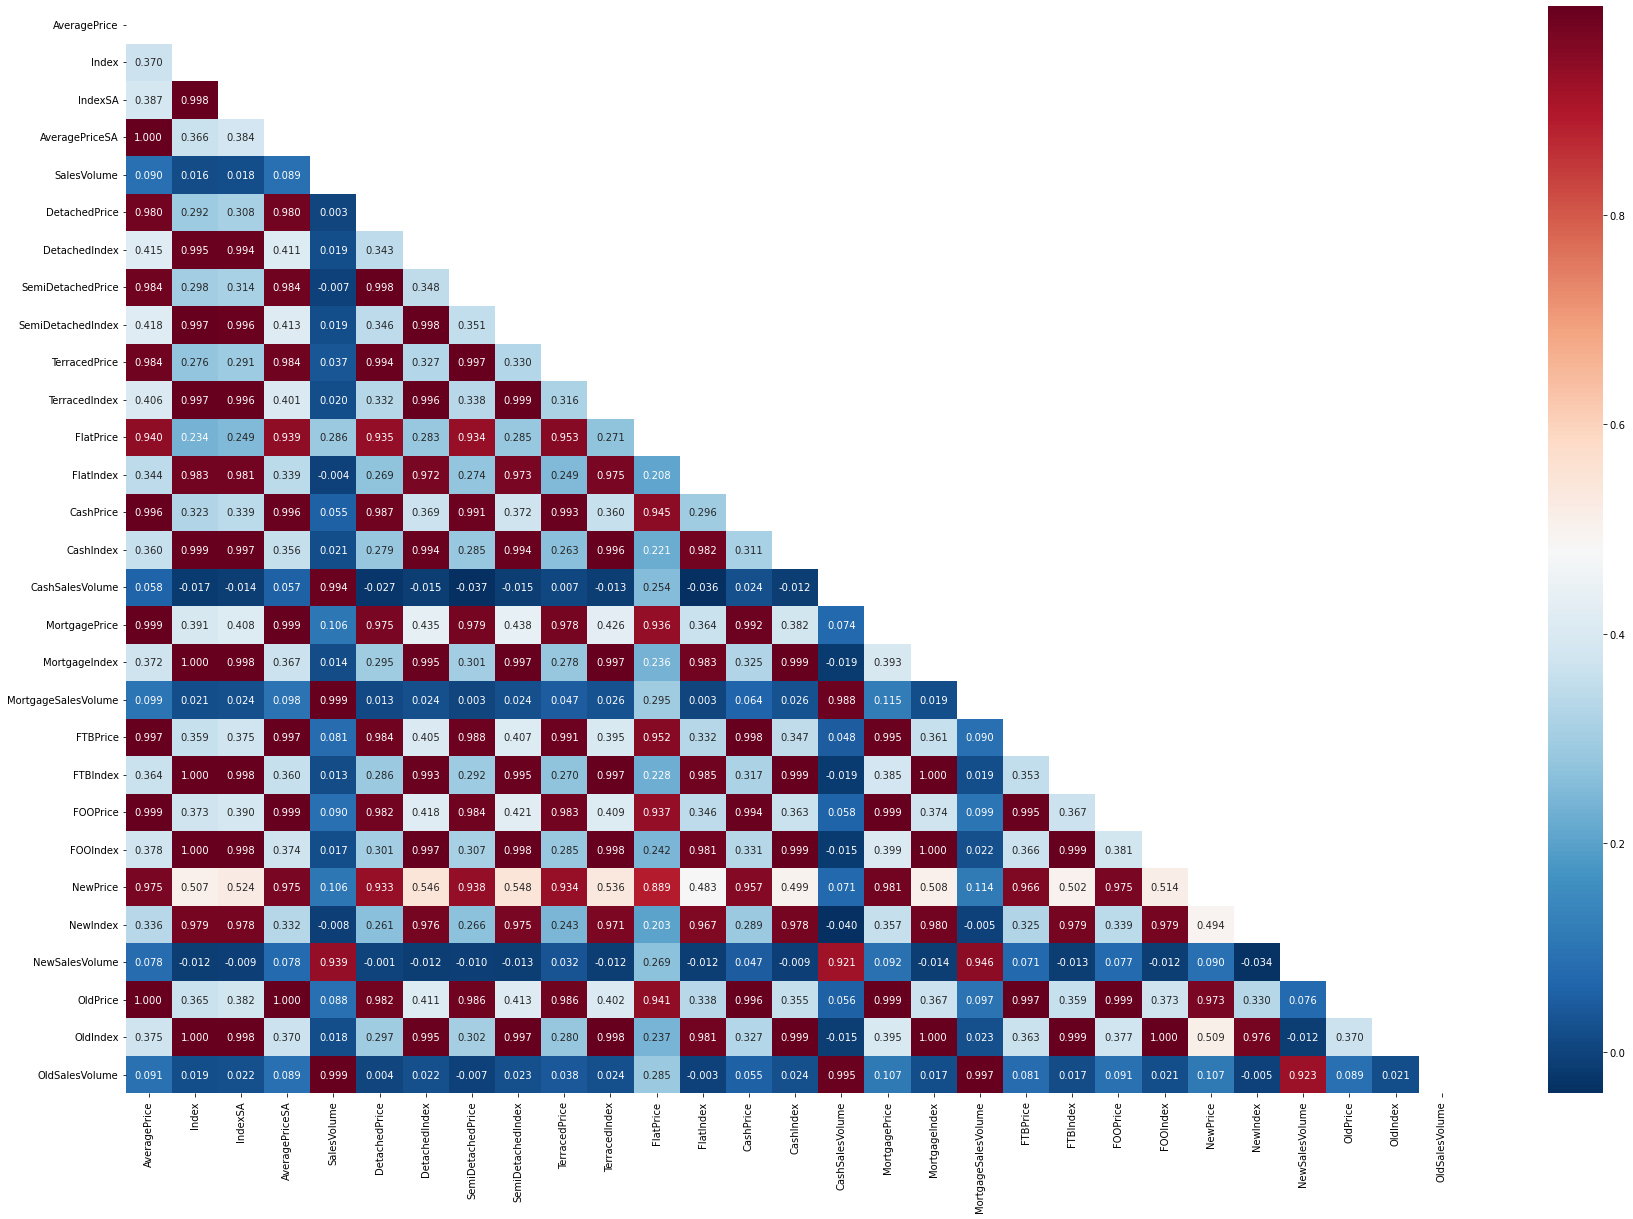

In [15]:
plt.figure(figsize = (30,20))

sns.heatmap(df.corr(),
           annot =True,
           fmt = '.3f',
           cmap = 'RdBu_r',
           mask = np.triu(df.corr()))
plt.show()

### Grouped heatmaps to better see correlations

<u>House type columns</u>

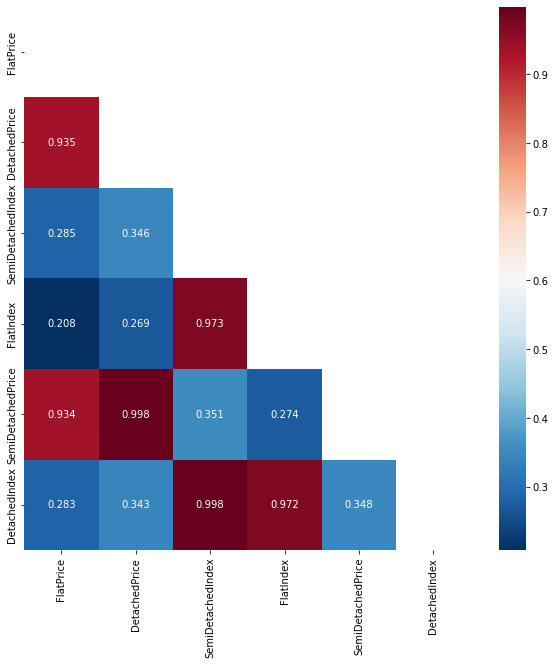

In [16]:
house_type_cols = set(re.findall('\w*Detached\w[^1-9]\w+|Terranced\w[^1-9]\w+|Flat\w[^1-9]\w+', str(df.columns)))
house_type_cols_df = pd.DataFrame(df[house_type_cols])

plt.figure(figsize = (10,10))

sns.heatmap(house_type_cols_df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house_type_cols_df.corr())
           )

plt.show()

<u>Price type columns</u>

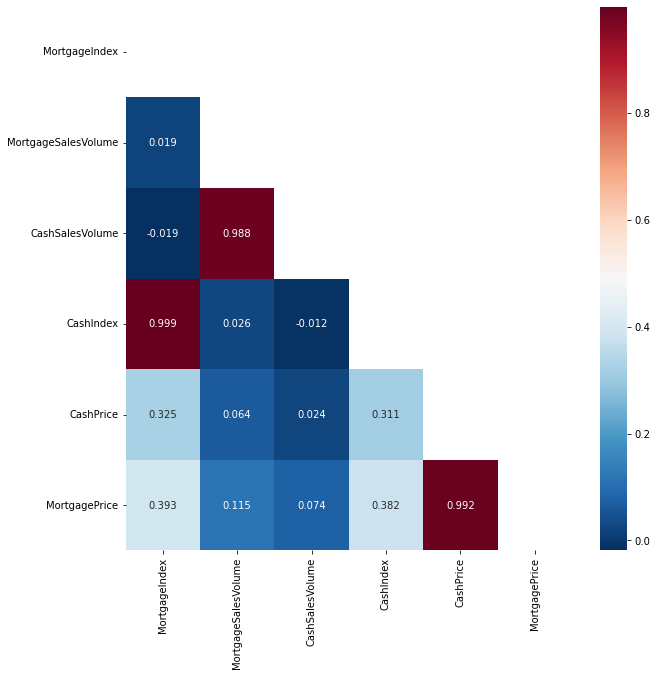

In [17]:
price_type_cols = set(re.findall('Cash\w[^1-9]\w+|Mortgage\w[^1-9]\w+', str(df.columns)))
price_type_cols_df = pd.DataFrame(df[price_type_cols])

plt.figure(figsize = (10,10))

sns.heatmap(price_type_cols_df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(price_type_cols_df.corr())
           )

plt.show()

<u>Housing build type columns</u>

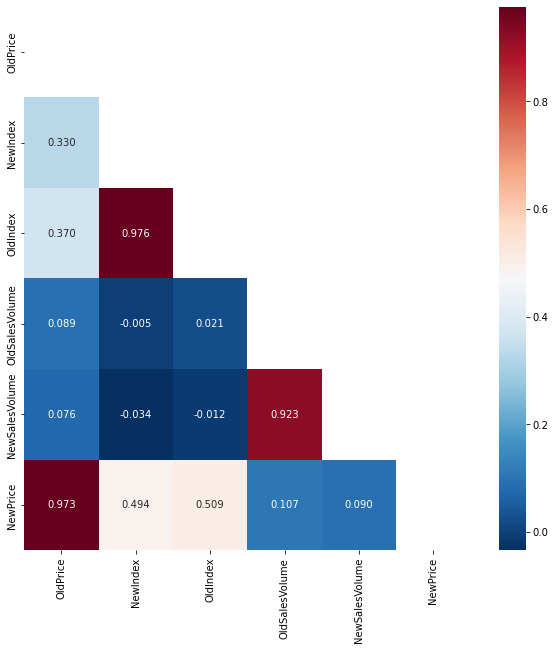

In [18]:
house_build_cols = set(re.findall('New\w[^1-9]\w+|Old[^1-9]\w+', str(df.columns)))
house_build_cols_df = pd.DataFrame(df[house_build_cols])

plt.figure(figsize = (10,10))

sns.heatmap(house_build_cols_df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(house_build_cols_df.corr())
           )

plt.show()

<u>Buyer type columns</u>

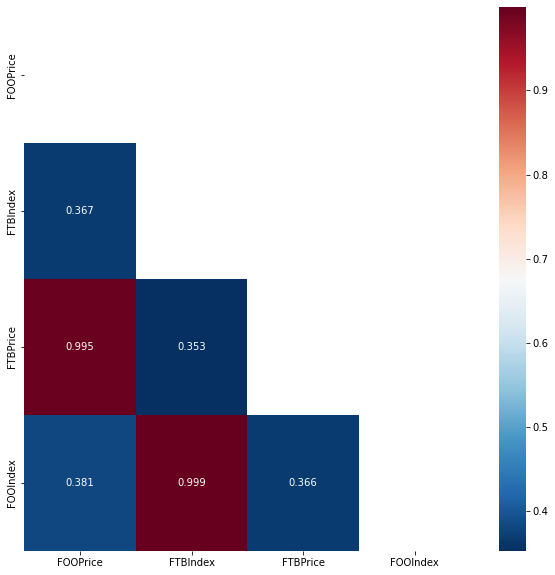

In [19]:
buyer_type_cols = set(re.findall('FTB[^1-9]\w+|FOO[^1-9]\w+', str(df.columns)))
buyer_type_cols_df = pd.DataFrame(df[buyer_type_cols])

plt.figure(figsize = (10,10))

sns.heatmap(buyer_type_cols_df.corr(), 
            annot=True,
            fmt='.3f',
            cmap='RdBu_r',
            mask=np.triu(buyer_type_cols_df.corr())
           )

plt.show()

## Train Test Split

In [20]:
# The Train test splitting 
X = df.drop('AveragePrice', axis=1) # The features
y = df['AveragePrice'] # The Target

X_train, X_test, y_train, y_test = train_test_split(X, # The features
                                                    y, # The Target
                                                    test_size=0.2, #what % are we dedicating to the testing set ?
                                                    random_state=0 #Random set, the number specifies the specific ramdon shuffel
                                                   )

In [21]:
# Check tkhat the incidies ended up the same in both sets
print(all(X_train.index == y_train.index))
print(all(X_test.index == y_test.index))

True
True


### Feature Engineering

In [22]:
#Creating the feature engineering function, to OHE, categorical columns and add a constant collumn for stats models

def feature_engineering(df):
        df = df.copy()
        df = pd.get_dummies(df,                 # Select data to dummy
                    columns=['RegionName','AreaCode'],# Which columns to OHE
                    prefix = None,               # Wish to add a prefix to the results?
                    drop_first = True,          # Want to drop the first dimension?
                    dtype = int)
        df['const'] = 1.0 #adding a constant because we'll use statsmodels
    
        return df

In [23]:
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

In [24]:
#Another check to ensure the column are consistant
list(X_train_fe.columns) == list(X_test_fe.columns)

True

In [25]:
location = set(re.findall('RegionName_[\w]+\s*[\w]+\s*[\w]+\s*[\w]+|AreaCode_[\w]+',str(X_train_fe.columns)))

## Linear Regression

In [26]:
feature_sets = {
    "house_type" : list(house_type_cols),
    "price_type" : list(price_type_cols),
    "house_buid_type" : list(house_build_cols),
    "buyer_type" : list(buyer_type_cols),
    "location" : list(location)
}

# Getting the best feature set with the best rmse
best_rmse = float('inf')
best_feature_set = None

for feature_set_name, features in feature_sets.items():
    print(f"Processing feature set: {feature_set_name}")
    
    # Train the OLS linear regression model
    lin_reg_ = sm.OLS(y_train, X_train_fe[features])
    lin_results_ = lin_reg_.fit()
    
    # Get predictions for the train set
    y_train_pred = lin_results_.predict(X_train_fe[features])
    rmse_train = statsmodels.tools.eval_measures.rmse(y_train, y_train_pred)
    
    # Get predictions for the test set
    y_test_pred = lin_results_.predict(X_test_fe[features])
    rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
    
    # Print RMSE results
    print(f"Train RMSE: {rmse_train}")
    print(f"Test RMSE: {rmse_test}")
    
    # Determine the best feature set based on the test RMSE
    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_feature_set = feature_set_name
    
    print("-" * 40)

# Print the best feature set
print(f"The best feature set is: {best_feature_set} with a Test RMSE of {best_rmse}")

Processing feature set: house_type
Train RMSE: 12702.695226400612
Test RMSE: 11824.619242092127
----------------------------------------
Processing feature set: price_type
Train RMSE: 345.0792082567276
Test RMSE: 334.2379475519148
----------------------------------------
Processing feature set: house_buid_type
Train RMSE: 775.9343218773313
Test RMSE: 743.1027422945326
----------------------------------------
Processing feature set: buyer_type
Train RMSE: 2010.988340600602
Test RMSE: 2004.076615689047
----------------------------------------
Processing feature set: location
Train RMSE: 39240.06515824752
Test RMSE: 37086.50997473356
----------------------------------------
The best feature set is: price_type with a Test RMSE of 334.2379475519148


## Logistic Regression, Decision Tree, Random Forest

### Turning the average price into categorical data

In [29]:
# Transform the continuous target variable into categorical bins
# Using pd.cut
bins = [y_train.min(), 200000, 300000, y_train.max()]
labels = [0, 1, 2]
y_train_categorical = pd.cut(y_train, bins=bins, labels=labels, include_lowest=True).astype(int)
y_test_categorical = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(int)

## Getting RMSE score from Logistic Regression, Decision Tree and Random Forest models

In [34]:
for feature_set_name, features in feature_sets.items():
    X_train = X_train_fe[features]
    X_test = X_test_fe[features]
    y_train = y_train_categorical
    y_test = y_test_categorical
    
    # Logistic Regression
    lr_model = LogisticRegression(max_iter=10000)
    lr_model.fit(X_train, y_train)
    y_train_pred_lr = lr_model.predict(X_train)
    y_test_pred_lr = lr_model.predict(X_test)
    rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
    rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
    
    # Decision Tree Regressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_train_pred_dt = dt_model.predict(X_train)
    y_test_pred_dt = dt_model.predict(X_test)
    rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
    rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
    
    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)
    rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
    rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
    
    # Print RMSE results
    print(f"Feature Set: {feature_set_name}")
    print(f"Logistic Regression - Train RMSE: {rmse_train_lr}, Test RMSE: {rmse_test_lr}")
    print(f"Decision Tree - Train RMSE: {rmse_train_dt}, Test RMSE: {rmse_test_dt}")
    print(f"Random Forest - Train RMSE: {rmse_train_rf}, Test RMSE: {rmse_test_rf}")
    
    # Determine the best model based on the lowest test RMSE
    best_model_name = min(
        [('Logistic Regression', rmse_test_lr), 
         ('Decision Tree', rmse_test_dt), 
         ('Random Forest', rmse_test_rf)],
        key=lambda x: x[1]
    )[0]
    
    print(f"Best model for {feature_set_name}: {best_model_name}")
    print("-" * 40)

Feature Set: house_type
Logistic Regression - Train RMSE: 0.4635746734157425, Test RMSE: 0.46820062223377973
Decision Tree - Train RMSE: 0.0, Test RMSE: 0.16460132459708002
Random Forest - Train RMSE: 0.04178955605260591, Test RMSE: 0.07840308881016979
Best model for house_type: Random Forest
----------------------------------------
Feature Set: price_type
Logistic Regression - Train RMSE: 0.45146177467217286, Test RMSE: 0.4269262346731772
Decision Tree - Train RMSE: 0.0, Test RMSE: 0.049629166698546515
Random Forest - Train RMSE: 0.024668990925866684, Test RMSE: 0.0540616324071163
Best model for price_type: Decision Tree
----------------------------------------
Feature Set: house_buid_type
Logistic Regression - Train RMSE: 0.474081949225322, Test RMSE: 0.4786063511998843
Decision Tree - Train RMSE: 0.0, Test RMSE: 0.08596023825918792
Random Forest - Train RMSE: 0.021996976953069975, Test RMSE: 0.08004924592648587
Best model for house_buid_type: Random Forest
--------------------------

## Comparative Analysis

**Linear Regression vs. Decision Trees:** Linear Regression assumes linearity, which is likely why it underperforms compared to Decision Trees on most feature sets. Decision Trees, being non-parametric, can model complex relationships and interactions between features more effectively. This flexibility allows them to better capture the nuances of the housing market, particularly in the Price Type feature set, where the difference between cash and mortgage purchases likely involves multiple factors that interact in a hierarchical manner.

**Decision Trees vs. Random Forests:** While Decision Trees can fit the training data perfectly, they are prone to overfitting, especially when the decision boundaries become too complex. Random Forests mitigate this issue by averaging predictions across many trees, leading to a more stable model with better generalization. However, in cases where a simple tree captures the essence of the relationships well, as seen in the Price Type feature set, a single Decision Tree can slightly outperform a Random Forest.

**Best Model and Feature Set:** The best performing model-feature combination for predicting housing prices is the Decision Tree model using the Price Type features, with a Test RMSE of 49.63. This combination captures the intricate, non-linear relationships between the funding status of a purchase and the house prices most effectively, without excessive overfitting.

### Model Performance Explanations
The superior performance of the Decision Tree model on the Price Type feature set can be explained by the nature of the housing market. The relationship between how a house is funded (cash or mortgage) and its price is likely influenced by multiple factors, such as buyer demographics, interest rates, and market conditions, which interact in complex ways. A Decision Tree can capture these interactions more effectively than a linear model.

The Random Forest model’s robustness across different feature sets underscores the importance of ensemble methods in machine learning, especially when dealing with noisy data or features that introduce overfitting risks. By averaging multiple trees, Random Forests provide a buffer against the variability that single trees might exhibit.

### Conclusion
In conclusion, predicting housing prices in London is a complex task that benefits from models capable of capturing non-linear relationships and interactions among features. The Decision Tree model, particularly when applied to the Price Type feature set, emerges as the best model for this dataset, achieving the lowest Test RMSE. However, Random Forests offer greater generalization across various feature sets, making them a robust alternative in scenarios where overfitting is a concern.

This analysis highlights the importance of choosing the right model and feature set combination, particularly in fields like real estate, where the interactions between variables can be intricate and multifaceted. Future work could explore the impact of additional features, such as economic indicators or social factors, to further refine predictions. Additionally, exploring more advanced models, such as Gradient Boosting Machines or Neural Networks, could provide even more accurate predictions, especially in cases with highly non-linear relationships.